<a href="https://colab.research.google.com/github/iwx09/Project-3-TuwaiqAcademy-DL-Keras/blob/main/Project-DL-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)

In [ ]:
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# looking at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0439 - accuracy: 0.9847 - val_loss: 0.6797 - val_accuracy: 0.8864
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0.6940 - val_accuracy: 0.8881
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9817 - val_loss: 0.6966 - val_accuracy: 0.8858
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0469 - accuracy: 0.9834 - val_loss: 0.7117 - val_accuracy: 0.8858
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0424 - accuracy: 0.9853 - val_loss: 0.6959 - val_accuracy: 0.8854
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0427 - accuracy: 0.9849 - val_loss: 0.7140 - val_accuracy: 0.8817
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9825 - val_loss: 0.7293 - val_accuracy: 0.8822

In [ ]:
pre = model.predict(X_test[1:2])

1/1 [==============================] - 0s 20ms/step


In [ ]:
pre

array([[2.1339024e-10, 0.0000000e+00, 1.0000000e+00, 1.3482723e-38,
        3.3773092e-11, 0.0000000e+00, 1.4339749e-16, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
max_index = np.argmax(pre, axis=1)

In [ ]:
max_index

array([2])

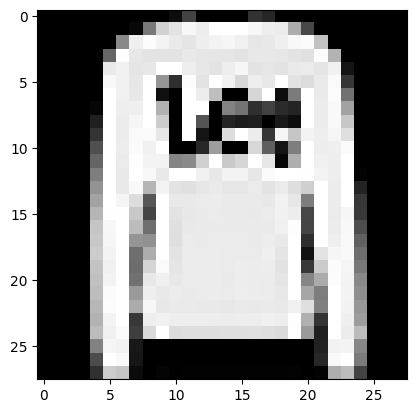

In [ ]:
plt.imshow(X_test[1:2].reshape((28,28)),cmap="gray")
plt.show()